# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


train_data = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [17]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [18]:
cnn.add( tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation= "relu", input_shape = [64,64,3]) )

### Step 2 - Pooling

In [19]:
cnn.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2) )

### Adding a second convolutional layer

In [21]:
cnn.add( tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation= "relu") )

cnn.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2) )

### Step 3 - Flattening

In [22]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))


### Step 5 - Output Layer

In [24]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid" ) )

## Part 3 - Training the CNN

### Compiling the CNN

In [30]:
cnn.compile(optimizer="adam",loss = "binary_crossentropy", metrics = ["accuracy"])


### Training the CNN on the Training set and evaluating it on the Test set

In [31]:
train = cnn.fit(train_data, validation_data = test_data, epochs = 20 )

Epoch 1/20
250/250 [==============================] - 29s 114ms/step - loss: 0.4735 - accuracy: 0.7730 - val_loss: 0.4594 - val_accuracy: 0.7885
Epoch 2/20
250/250 [==============================] - 28s 111ms/step - loss: 0.4610 - accuracy: 0.7829 - val_loss: 0.4419 - val_accuracy: 0.7935
Epoch 3/20
250/250 [==============================] - 28s 113ms/step - loss: 0.4502 - accuracy: 0.7883 - val_loss: 0.4555 - val_accuracy: 0.7785
Epoch 4/20
250/250 [==============================] - 28s 113ms/step - loss: 0.4446 - accuracy: 0.7862 - val_loss: 0.4537 - val_accuracy: 0.7860
Epoch 5/20
250/250 [==============================] - 28s 113ms/step - loss: 0.4292 - accuracy: 0.7985 - val_loss: 0.4553 - val_accuracy: 0.7870
Epoch 6/20
250/250 [==============================] - 28s 114ms/step - loss: 0.4168 - accuracy: 0.8058 - val_loss: 0.6530 - val_accuracy: 0.6940
Epoch 7/20
250/250 [==============================] - 28s 113ms/step - loss: 0.4228 - accuracy: 0.8018 - val_loss: 0.4105 - val_ac

Train: 0.887, Test: 0.827


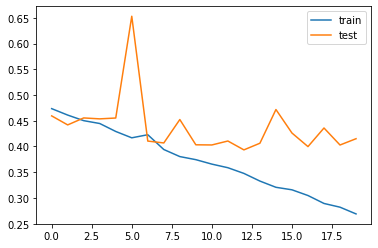

In [32]:
# evaluate the model
_, train_acc = cnn.evaluate(train_data, verbose=0)
_, test_acc = cnn.evaluate(test_data, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.legend()
plt.show()

## Part 4 - Making a single prediction

dog


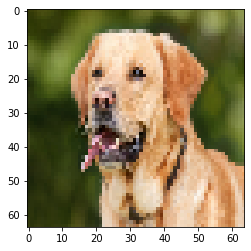

In [44]:
from keras.preprocessing import image
test_image1 = image.load_img("dataset/single_prediction/cat_or_dog_1.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_data.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)
plt.imshow(test_image1)

  